Hello, 

This Jupyter Notebook was written regarding a recent EPFL ROCKET TEAM - PROJETO JUPITER collaboration, started on 2020 September.

Thanks to **Antoine Scardigli** for all helps during these analysis!

*Brazil - Switzerland*

# Mouting in google drive

In [1]:
!sed -i -e 's/enforce_single_parent:true/enforce_single_parent:true,metadata_cache_reset_counter:4/' /usr/local/lib/python3.6/dist-packages/google/colab/drive.py
from google.colab import drive
import importlib
_ = importlib.reload(drive)

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import os
os.chdir("/drive/Shared drives/ERT-PJ-Collab/ERT_Kaltbrunn flight")

In [ ]:
#os.listdir()

# Importing libraries

In [3]:
pip install rocketpyalpha

     |████████████████████████████████| 81kB 6.6MB/s 


In [4]:
pip install netCDF4

     |████████████████████████████████| 4.3MB 12.5MB/s 
     |████████████████████████████████| 296kB 47.0MB/s 


In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight, Function
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

# Defining all parameters

In [3]:
parameters = {
    # Mass Details
    "rocketMass": (18.227, 0.010),    # 1.373 = propellant mass
    
    # Propulsion Details
    "impulse": (2157, 0.03*2157),
    "burnOut": (2.43, 0.1),
    "nozzleRadius": (44.45/1000, 0.001),
    "throatRadius": (21.4376/1000, 0.001),
    "grainSeparation": (3/1000, 1/1000),
    "grainDensity": (782.4, 30),
    "grainOuterRadius": (85.598/2000, 0.001),
    "grainInitialInnerRadius": (33.147/1000, 0.002),
    "grainInitialHeight": (152.4/1000, 0.001),

    # Aerodynamic Details
    "inertiaI": (0.78267, 0.03*0.78267),
    "inertiaZ": (0.064244, 0.03*0.064244),
    "radius": (156/2000, 0.001),
    "distanceRocketNozzle": (-1.1356, 0.100),
    "distanceRocketPropellant": (-1, 0.100),
    "powerOffDrag": (1, 0.05),
    "powerOnDrag": (1, 0.05),
    "noseLength": (0.242, 0.001),
    "noseDistanceToCM": (1.3, 0.100),
    "finSpan": (0.200, 0.001),
    "finRootChord": (0.280, 0.001),
    "finTipChord": (0.125, 0.001),
    "finDistanceToCM": (-0.75, 0.100),
    "tailTopRadius": (156/2000, 0.001),
    "tailBottomRadius": (135/2000, 0.001),
    "tailLength": (0.050, 0.001),
    "tailDistanceToCM": (-1.0856, 0.001),

    # Launch and Environment Details
    "windDirection":(0, 5),
    "windSpeed":(1, 0.05),
    "inclination": (89, 1),
    "heading": (45, 5),
    "railLength": (4.2, 0.001),
        
    # Parachute Details
    "CdSDrogue": ( np.pi/4, 0.20*np.pi/4),
    "lag_rec": (1, 0.020),
    }

# Environment conditions

In [ ]:
# help(Environment.setAtmosphericModel)

In [4]:
Env = Environment(railLength= parameters.get('railLength')[0],
                  gravity= 9.81,         
                  latitude= 47.213476,    
                  longitude= 9.003336,    
                  date= (2020, 2, 22, 13),
                  elevation= 407)     

In [5]:
# Env.setAtmosphericModel(type= "Reanalysis",
#                         file= "4july_ERA5_since1979_hourly.nc",
#                         dictionary= "ECMWF")

Env.setAtmosphericModel(type= "Reanalysis",
                        file= "environment.nc",
                        dictionary= "ECMWF")

# Env.setAtmosphericModel(type='Ensemble', file='GEFS')
#                         # dictionary='ECMWF')

Env.maxExpectedHeight = 1000

Gravity Details

Acceleration of Gravity: 9.81 m/s²


Launch Site Details

Launch Rail Length:  4.2  m
Launch Date:  2020-02-22 13:00:00  UTC
Launch Site Latitude: 47.21348°
Launch Site Longitude: 9.00334°
Launch Site Surface Elevation: 407.0 m


Atmospheric Model Details

Atmospheric Model Type:  Reanalysis
Reanalysis Maximum Height: 1.000 km
Reanalysis Time Period: From  1979-02-21 12:00:00  to  2020-02-23 14:00:00  UTC
Reanalysis Hour Interval:  17  hrs
Reanalysis Latitude Range: From  54.0 ° To  40.0 °
Reanalysis Longitude Range: From  2.0 ° To  16.0 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.25 m/s
Surface Wind Direction: 213.46°
Surface Wind Heading: 33.46°
Surface Pressure: 975.00 hPa
Surface Temperature: 286.32 K
Surface Air Density: 1.186 kg/m³
Surface Speed of Sound: 339.21 m/s


Atmospheric Model Plots


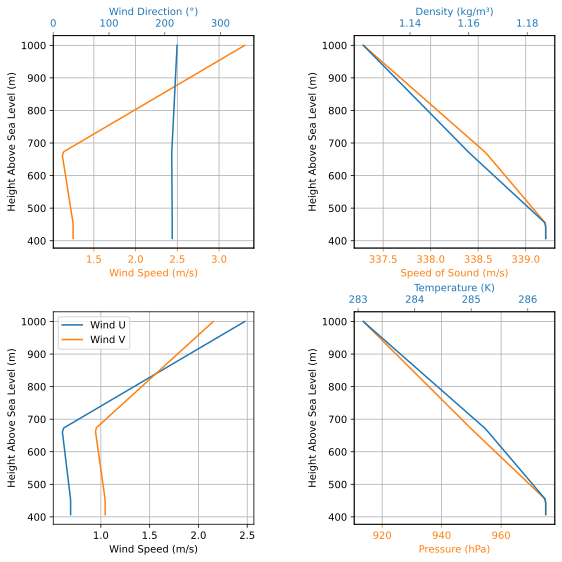

In [6]:
Env.allInfo()

# Motor Information

In [7]:
K828FJ = SolidMotor(thrustSource="AeroTech_K828FJ.eng",                                        
                   burnOut= parameters.get('burnOut')[0],                                     
                   grainNumber=3,                                                             
                   grainSeparation= parameters.get('grainSeparation')[0],                      
                   grainDensity= parameters.get('grainDensity')[0],                           
                   grainOuterRadius= parameters.get('grainOuterRadius')[0],                   
                   grainInitialInnerRadius= parameters.get('grainInitialInnerRadius')[0],     
                   grainInitialHeight= parameters.get('grainInitialHeight')[0],               
                   nozzleRadius= parameters.get('nozzleRadius')[0],                           
                   throatRadius= parameters.get('throatRadius')[0],                           
                   interpolationMethod= 'linear'
)


Motor Details
Total Burning Time: 2.5 s
Total Propellant Mass: 0.824 kg
Propellant Exhaust Velocity: 2515.383 m/s
Average Thrust: 828.841 N
Maximum Thrust: 1303.79 N at 0.04 s after ignition.
Total Impulse: 2072.102 Ns

Plots


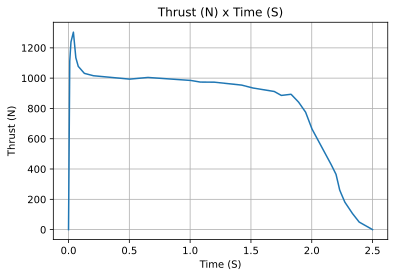

In [8]:
K828FJ.info()

# Rocket information

In [9]:
BellaLui = Rocket(motor= K828FJ,
             radius= parameters.get('radius')[0],
             mass= parameters.get('rocketMass')[0],
             inertiaI= parameters.get('inertiaI')[0],
             inertiaZ= parameters.get('inertiaZ')[0],
             distanceRocketNozzle= parameters.get('distanceRocketNozzle')[0],
             distanceRocketPropellant= parameters.get('distanceRocketPropellant')[0],
             powerOffDrag= 0.43,     
             powerOnDrag=  0.43)

BellaLui.setRailButtons([0.1, -0.5])

NoseCone = BellaLui.addNose(length= parameters.get('noseLength')[0], 
                            kind="tangent", 
                            distanceToCM= parameters.get('noseDistanceToCM')[0])

FinSet = BellaLui.addFins(3, 
                          span= parameters.get('finSpan')[0], 
                          rootChord= parameters.get('finRootChord')[0], 
                          tipChord= parameters.get('finTipChord')[0], 
                          distanceToCM= parameters.get('finDistanceToCM')[0])

Tail = BellaLui.addTail(topRadius= parameters.get('tailTopRadius')[0], 
                        bottomRadius= parameters.get('tailBottomRadius')[0], 
                        length= parameters.get('tailLength')[0], 
                        distanceToCM= parameters.get('tailDistanceToCM')[0])

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

Drogue = BellaLui.addParachute('Drogue',
                              CdS= parameters.get('CdSDrogue')[0],
                              trigger=drogueTrigger, 
                              samplingRate=105,
                              lag= parameters.get('lag_rec')[0],
                              noise=(0, 8.3, 0.5))

# Define aerodynamic drag coefficients
BellaLui.powerOffDrag = Function(
    [(0.01, 0.51), (0.02, 0.46), (0.04, 0.43), (0.28, 0.43), (0.29, 0.44), (0.45, 0.44), (0.49, 0.46)],
    "Mach Number",
    "Drag Coefficient with Power Off",
    "linear",
    "constant",
)
BellaLui.powerOnDrag = Function(
    [(0.01, 0.51), (0.02, 0.46), (0.04, 0.43), (0.28, 0.43), (0.29, 0.44), (0.45, 0.44), (0.49, 0.46)],
    "Mach Number",
    "Drag Coefficient with Power On",
    "linear",
    "constant",
)


BellaLui.powerOffDrag *= parameters.get('powerOffDrag')[0]
BellaLui.powerOnDrag  *= parameters.get('powerOnDrag')[0]

Inertia Details
Rocket Dry Mass: 18.227 kg (No Propellant)
Rocket Total Mass: 19.050772243115052 kg (With Propellant)

Geometrical Parameters
Rocket Radius: 0.078 m

Aerodynamics Stability
Initial Static Margin: 2.745 c
Final Static Margin: 3.022 c

Drogue Parachute
CdS Coefficient: 0.7853981633974483 m2

Aerodynamics Plots


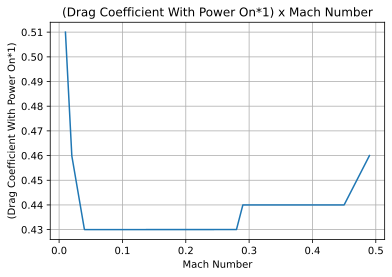

In [15]:
BellaLui.info()

# Flight

In [ ]:
#help(Flight)

In [10]:
TestFlight = Flight(rocket=BellaLui, 
                    environment=Env, 
                    inclination= parameters.get('inclination')[0], 
                    heading= parameters.get('heading')[0])

In [11]:
TestFlight.info()

Surface Wind Conditions

Frontal Surface Wind Speed: 1.23 m/s
Lateral Surface Wind Speed: 0.25 m/s


 Rail Departure State

Rail Departure Time: 0.359 s
Rail Departure Velocity: 16.189 m/s
Rail Departure Static Margin: 2.793 c
Rail Departure Angle of Attack: 4.425°
Rail Departure Thrust-Weight Ratio: 5.416
Rail Departure Reynolds Number: 1.685e+05


BurnOut State

BurnOut time: 2.500 s
Altitude at burnOut: 128.924 m (AGL)
Rocket velocity at burnOut: 84.400 m/s
Freestream velocity at burnOut: 84.442 m/s
Mach Number at burnOut: 0.249
Kinetic energy at burnOut: 6.492e+04 J


Apogee

Apogee Altitude: 868.033 m (ASL) | 461.033 m (AGL)
Apogee Time: 10.614 s
Apogee Freestream Speed: 4.204 m/s


Events

Drogue Ejection Triggered at: 10.619 s
Drogue Parachute Inflated at: 11.619 s
Drogue Parachute Inflated with Freestream Speed of: 10.372 m/s
Drogue Parachute Inflated at Height of: 456.181 m (AGL)


Impact

X Impact: 7.155 m
Y Impact: -5.107 m
Time of Impact: 35.853 s
Velocity at Impact: -19.59

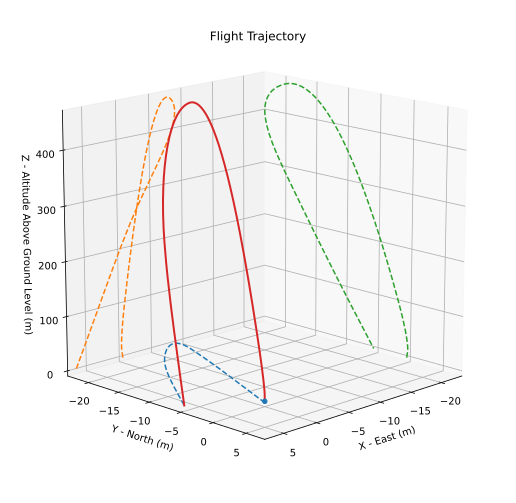

In [18]:
TestFlight.plot3dTrajectory()

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 407.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.924 | e1: -0.008 | e2: 0.003 | e3: -0.383
Euler Angles - Spin φ : 0.00° | Nutation θ: -1.00° | Precession ψ: -45.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 89.00°
Launch Rail Heading: 45.00°


Surface Wind Conditions

Frontal Surface Wind Speed: 1.23 m/s
Lateral Surface Wind Speed: 0.25 m/s


 Rail Departure State

Rail Departure Time: 0.359 s
Rail Departure Velocity: 16.189 m/s
Rail Departure Static Margin: 2.793 c
Rail Departure Angle of Attack: 4.425°
Rail Departure Thrust-Weight Ratio: 5.416
Rail Departure Reynolds Number: 1.685e+05


BurnOut State

BurnOut time: 2.500 s
Altitude at burnOut: 128.924 m (AGL)
Rocket velocity at burnOut: 84.400 m/s
Freestream velocity at burnOut: 84.442 m/s
Mach Number at burnOut: 0.249
Kinetic energy at burnOut: 6.492e+04 J


Apogee

Ap

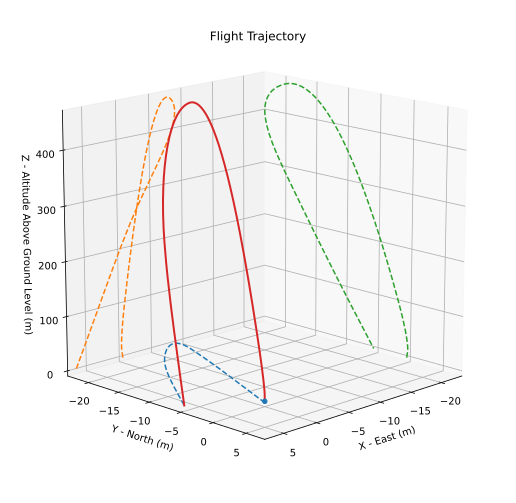



Trajectory Kinematic Plots



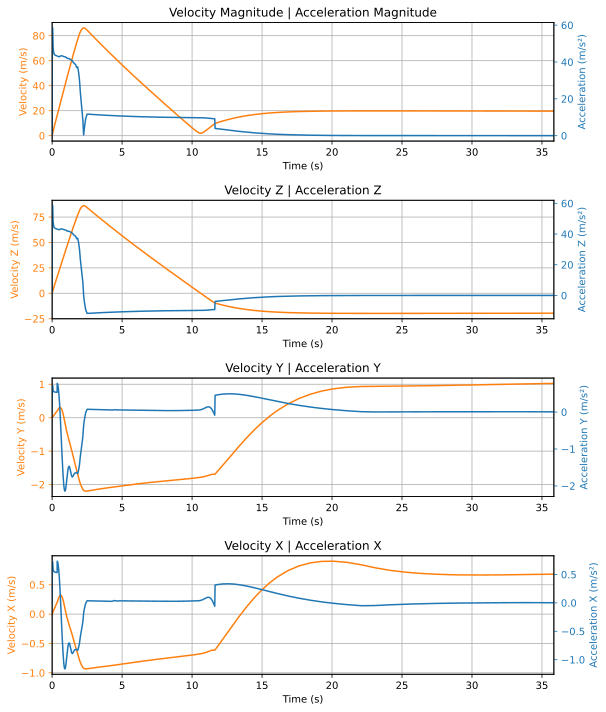



Angular Position Plots



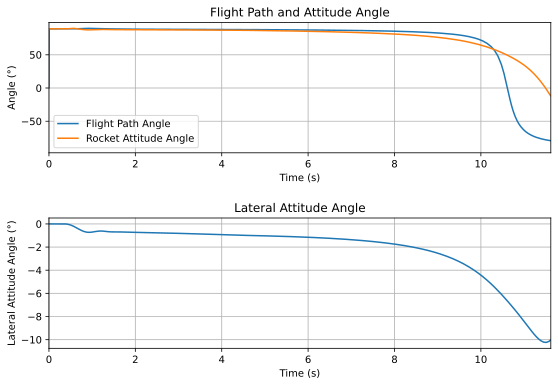



Path, Attitude and Lateral Attitude Angle plots



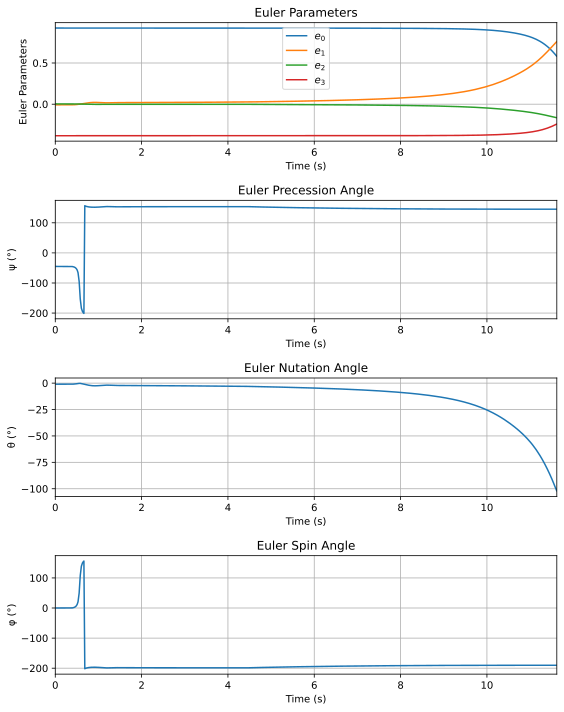



Trajectory Angular Velocity and Acceleration Plots



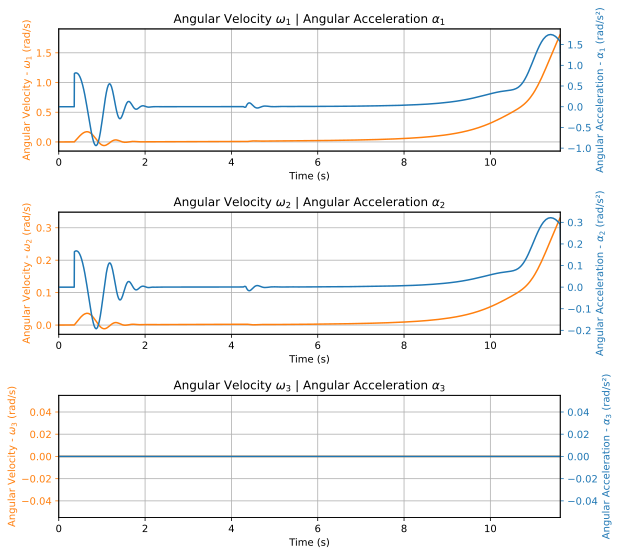



Trajectory Force Plots



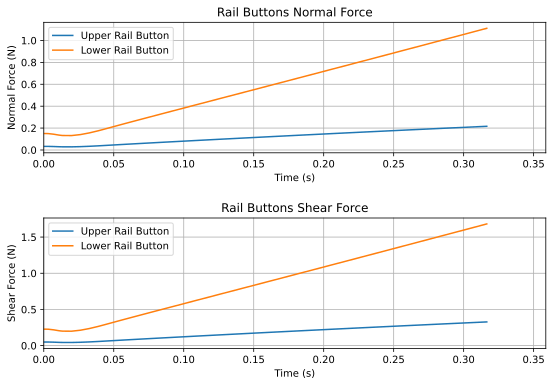

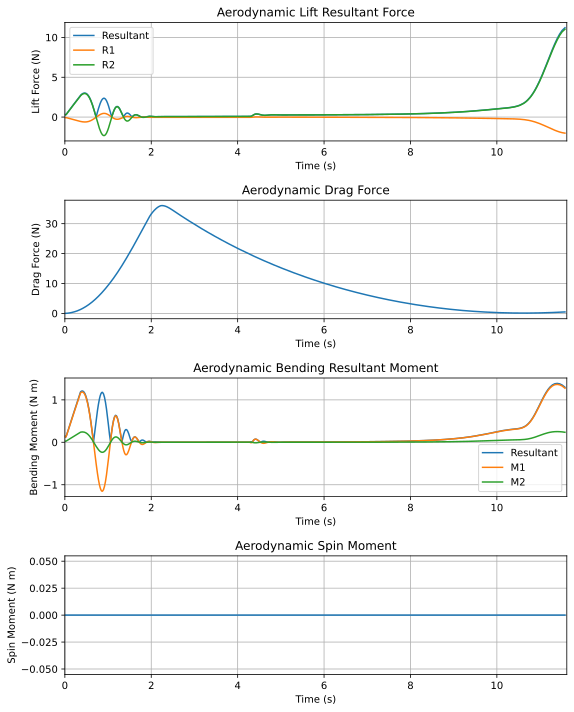



Trajectory Energy Plots



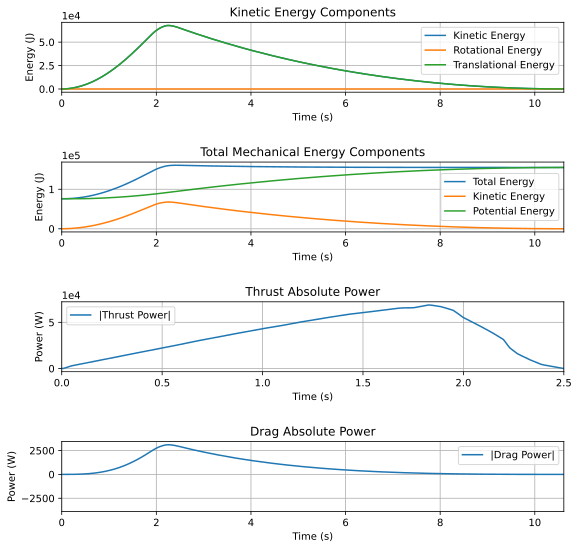



Trajectory Fluid Mechanics Plots



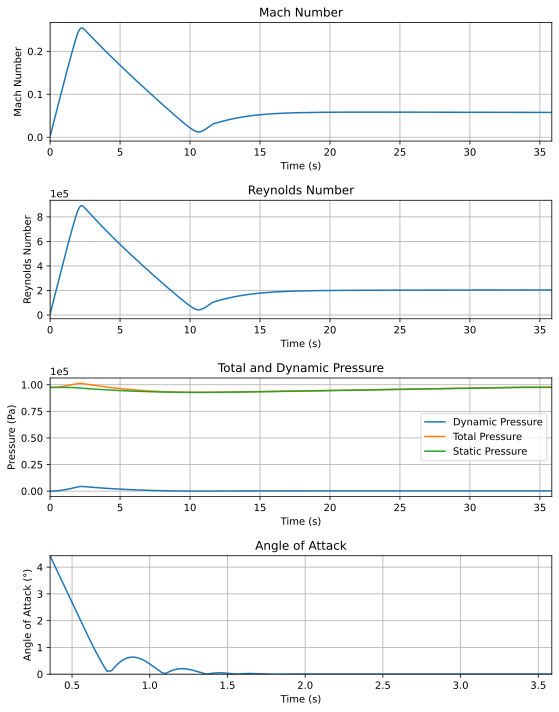



Trajectory Stability and Control Plots



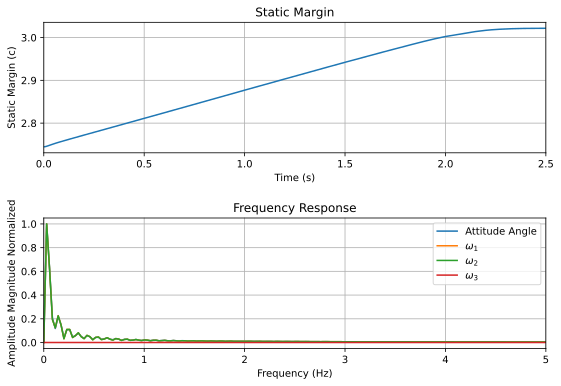

In [19]:
#TestFlight.plotAngularKinematicsData()
#TestFlight.plotAttitudeData()
#TestFlight.plotEnergyData()
#TestFlight.plotFlightPathAngleData()
#TestFlight.plotFluidMechanicsData()
#TestFlight.plotLinearKinematicsData()
#TestFlight.plotPressureSignals()
#TestFlight.plotStabilityAndControlData()
#TestFlight.plotTrajectoryForceData()
TestFlight.allInfo()   # This includes all previous lines

# Comparision with Real Data

In [12]:
flightData = np.loadtxt("ERT_KaltBrunn_avionics_clean.csv", skiprows=1, delimiter=',', usecols=(2, 3, 4))

In [13]:
time_Kalt = flightData[:573, 0]
altitude_Kalt = flightData[:573, 1]
vertVel_Kalt = flightData[:573, 2]

In [14]:
print(len(time_Kalt))
print(len(altitude_Kalt))
print(len(vertVel_Kalt))

# Make sure that all vectors have the same length

573
573
573


In [15]:
time_rcp = []
altitude_rcp = []
velocity_rcp = []
acceleration_rcp = []

i = 0
while i<=int(TestFlight.tFinal):
  time_rcp.append(i)
  altitude_rcp.append(TestFlight.z(i) - TestFlight.env.elevation)
  velocity_rcp.append(TestFlight.vz(i))
  acceleration_rcp.append(TestFlight.az(i))
  i+=0.005

time_rcp.append(TestFlight.tFinal)
altitude_rcp.append(0)
velocity_rcp.append(TestFlight.vz(TestFlight.tFinal))
acceleration_rcp.append(TestFlight.az(TestFlight.tFinal))

In [16]:
print(len(time_rcp))
print(len(altitude_rcp))
print(len(velocity_rcp))
print(len(acceleration_rcp))


7002
7002
7002
7002


In [25]:
print(altitude_rcp[-1])

0


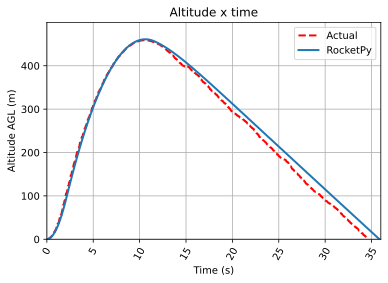

In [26]:
plt.plot(time_Kalt, altitude_Kalt, 'r--', label='Actual', linewidth=2)
plt.plot(time_rcp, altitude_rcp, label='RocketPy', linewidth=2)

plt.title('Altitude x time')
plt.xlabel('Time (s)')
plt.ylabel('Altitude AGL (m)')

plt.xlim(0, 36)
plt.ylim(0, 500)

plt.xticks(np.arange(0, 36, 5), rotation=60)
plt.yticks(np.arange(0, 500, 100))
plt.legend()
plt.grid()

#plt.savefig('graphs/altitude_v0.pdf')

plt.show()

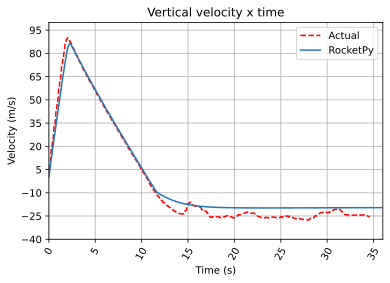

In [27]:
plt.plot(time_Kalt, vertVel_Kalt, 'r--', label='Actual')
plt.plot(time_rcp, velocity_rcp, label='RocketPy')

plt.title('Vertical velocity x time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.xlim(0, 36)
plt.ylim(-40, 100)

plt.xticks(np.arange(0, 36, 5), rotation=60)
plt.yticks(np.arange(-40, 101, 15))

plt.legend()
plt.grid()

#plt.savefig('graphs/velocity_v0.pdf')

plt.show()

### Acceleration comparison (will not be used in our publication)

In [28]:
from scipy.signal import savgol_filter

In [29]:
# Calculate the acceleration as a velocity derivative

acceleration_Kalt = [0]
for i in range(1, len(vertVel_Kalt), 1):
  acc = (vertVel_Kalt[i]-vertVel_Kalt[i-1])/(time_Kalt[i]-time_Kalt[i-1])
  acceleration_Kalt.append(acc)

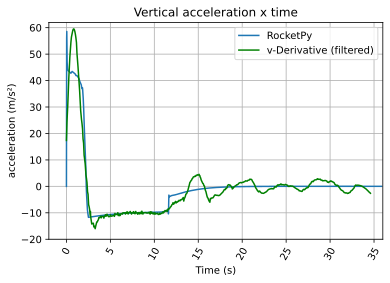

In [30]:
acceleration_Kalt_filt = savgol_filter(acceleration_Kalt, 51, 3)   #Filter our data

#plt.plot(time_Kalt, acceleration_Kalt, 'r', label='Actual')
plt.plot(time_rcp, acceleration_rcp, label='RocketPy')
plt.plot(time_Kalt, acceleration_Kalt_filt, 'g', label='v-Derivative (filtered)')

plt.title('Vertical acceleration x time')
plt.xlabel('Time (s)')
plt.ylabel('acceleration (m/s²)')

plt.xlim(-2, 36)
plt.ylim(-20, 62)

plt.xticks(np.arange(0, 36, 5), rotation=60)
plt.legend()
plt.grid()

#plt.savefig("graphs/acceleation_v0.pdf")

plt.show()

In [19]:
plt.style.use(['science', 'no-latex', 'grid'])

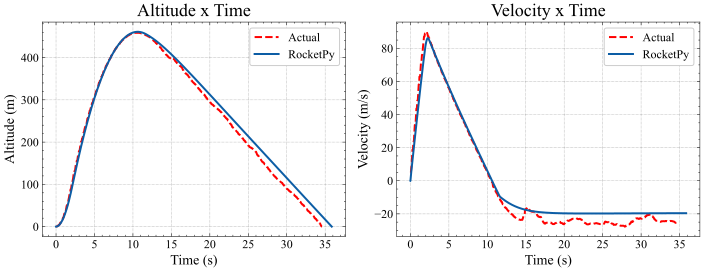

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

fig.suptitle("Comparison for the Bella Lui Kaltbrunn Mission", fontsize=22)

ax1.plot(time_Kalt, altitude_Kalt, 'r--', label="Actual", linewidth=2)
ax1.plot(time_rcp, altitude_rcp, label="RocketPy", linewidth=2)
ax1.set_title("Altitude x Time", fontsize=18)
ax1.set_ylabel("Altitude (m)", fontsize=14)
ax1.set_xlabel("Time (s)", fontsize=14)


ax2.plot(time_Kalt, vertVel_Kalt, 'r--', label="Actual", linewidth=2)  #df_ndrt['Velocity']
ax2.plot(time_rcp, velocity_rcp, label="RocketPy", linewidth=2)
ax2.set_title("Velocity x Time", fontsize=18)
ax2.set_ylabel("Velocity (m/s)", fontsize=14)
ax2.set_xlabel("Time (s)", fontsize=14)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)

plt.tight_layout()

#plt.savefig('')

plt.show()

## Summary

In [31]:
print("Apogee (AGL)")
print("RocketPy: {:.2f} meters".format(TestFlight.apogee - TestFlight.env.elevation))
print("Real data: {:.2f} meters".format(max(altitude_Kalt)))
print("RocketPy - Real data: {:.2f} meters".format(abs(max(altitude_Kalt) - TestFlight.apogee + TestFlight.env.elevation)))
print()

print("Max Velocity")
print("RocketPy:  {:.2f} m/s".format(max(velocity_rcp)))
print("Real data: {:.2f} m/s".format(max(vertVel_Kalt)))
print("RocketPy - Real data: {:.2f} m/s".format(max(velocity_rcp) - max(vertVel_Kalt)))
print()

print("Max Acceleration")
print("RocketPy:  {:.2f} m/s²".format(max(acceleration_rcp)))
print("Real data (derivative): {:.2f} m/s²".format(max(acceleration_Kalt_filt)))
print("RocketPy - Real data: {:.2f} m/s^2".format(max(acceleration_rcp) - max(acceleration_Kalt_filt)))

Apogee (AGL)
RocketPy: 461.03 meters
Real data: 458.97 meters
RocketPy - Real data: 2.06 meters

Max Velocity
RocketPy:  86.18 m/s
Real data: 90.00 m/s
RocketPy - Real data: -3.82 m/s

Max Acceleration
RocketPy:  58.55 m/s²
Real data (derivative): 59.53 m/s²
RocketPy - Real data: -0.98 m/s^2


In [32]:
print(velocity_rcp[-1])    # Impact velocity - Rocketpy

-19.591621608845152


# Monte Carlo Dispersion Analysis

(will not be used)

In [ ]:
from numpy.random import normal, uniform, choice
from datetime import datetime
import glob

#import numpy as np
import IPython

In [ ]:
# Real Impact Point: 
# lat/lon:  
# UTM: 
# x,y = 

# And do not forget the lanch point in UTM:
# x0,y0 = 

# landing point:
# x,y = 

## Creating a Flight Settings Generator

In [ ]:
def flight_settings(analysis_parameters, total_number):
    i = 0
    while i < total_number:
        # Generate a flight setting
        flight_setting = {}
        for parameter_key, parameter_value in analysis_parameters.items():
            if type(parameter_value) is tuple:
                flight_setting[parameter_key] =  normal(*parameter_value)
            else:
                flight_setting[parameter_key] =  choice(parameter_value)
        # Update counter
        i += 1
        # Yield a flight setting
        yield flight_setting

## Creating an Export Function

In [ ]:
filename = ''

dispersion_error_file = open(str(filename)+'.disp_error.txt', 'w')
dispersion_input_file = open(str(filename)+'.disp_in.txt', 'w')
dispersion_output_file = open(str(filename)+'.disp_out.txt', 'w')

def export_flight_data(flight_setting, flight_data):
    # Generate flight results
    flight_result = {"outOfRailTime": flight_data.outOfRailTime,
                 "outOfRailVelocity": flight_data.outOfRailVelocity,
                        "apogeeTime": flight_data.apogeeTime,
                    "apogeeAltitude": flight_data.apogee - Env.elevation,
                           "apogeeX": flight_data.apogeeX,
                           "apogeeY": flight_data.apogeeY,
                        "impactTime": flight_data.tFinal,
                           "impactX": flight_data.xImpact,
                           "impactY": flight_data.yImpact,
                    "impactVelocity": flight_data.impactVelocity,
               "initialStaticMargin": flight_data.rocket.staticMargin(0),
             "outOfRailStaticMargin": flight_data.rocket.staticMargin(TestFlight.outOfRailTime),
                 "finalStaticMargin": flight_data.rocket.staticMargin(TestFlight.rocket.motor.burnOutTime),
                    "numberOfEvents": len(flight_data.parachuteEvents)}
    
    # Calculate maximum reached velocity
    sol = np.array(flight_data.solution)
    flight_data.vx = Function(sol[:, [0, 4]], 'Time (s)', 'Vx (m/s)', 'linear', extrapolation="natural")
    flight_data.vy = Function(sol[:, [0, 5]], 'Time (s)', 'Vy (m/s)', 'linear', extrapolation="natural")
    flight_data.vz = Function(sol[:, [0, 6]], 'Time (s)', 'Vz (m/s)', 'linear', extrapolation="natural")
    flight_data.v = (flight_data.vx**2 + flight_data.vy**2 + flight_data.vz**2)**0.5
    flight_data.maxVel = np.amax(flight_data.v.source[:, 1])
    flight_result['maxVelocity'] = flight_data.maxVel
    
    # Take care of parachute results
    if len(flight_data.parachuteEvents) > 0:
        flight_result['drogueTriggerTime'] = flight_data.parachuteEvents[0][0]
        flight_result['drogueInflatedTime'] = flight_data.parachuteEvents[0][0] + flight_data.parachuteEvents[0][1].lag
        flight_result['drogueInflatedVelocity'] = flight_data.v(flight_data.parachuteEvents[0][0] + flight_data.parachuteEvents[0][1].lag)
    else:
        flight_result['drogueTriggerTime'] = 0
        flight_result['drogueInflatedTime'] = 0
        flight_result['drogueInflatedVelocity'] = 0
    
    # Write flight setting and results to file
    dispersion_input_file.write(str(flight_setting) + '\n')
    dispersion_output_file.write(str(flight_result) + '\n')

def export_flight_error(flight_setting):
    dispersion_output_file.write(str(flight_setting) + '\n')

## Simulating Each Flight Setting

In [ ]:
# Initialize counter and timer
i = 0
initial_time = datetime.now()

Envi = Environment(Environment(railLength= parameters.get('railLength')[0],
                  gravity= 9.81,         
                  latitude= 47.213476,    
                  longitude= 9.003336,    
                  date= (2020, 2, 22, 13),
                  elevation= 407))

Envi.maxExpectedHeight = 1000

# Envi.setAtmosphericModel(type= "Reanalysis",
#                         file= "4july_ERA5_since1979_hourly.nc",
#                         dictionary= "ECMWF")

def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False

# Iterate over flight settings
out = display(IPython.display.Pretty('Starting'), display_id=True)

for setting in flight_settings(parameters, 1000):    # ESCOLHA AQUI O NUMERO DE SIMULACOES
    # Print current iteration
    i += 1
    out.update(IPython.display.Pretty("Curent iteration: " + str(i) + " | Average Time per Iteration: {:2.6f} s".format((datetime.now() - initial_time).seconds/i)))
    # print("Curent iteration: ", i)
          
    # Modify environment
    Envi.railLength = setting['railLength']
    Envi.windDirection += setting['windDirection']
    Envi.windSpeed     *= setting['windSpeed']

    # Create motor
    M2400 = SolidMotor(thrustSource="AeroTech_K828FJ.eng",                                        
                       burnOut= setting['burnOut'],                                     
                       grainNumber=3,                                                             
                       grainSeparation= setting['grainSeparation'],                      
                       grainDensity= setting['grainDensity'],                           
                       grainOuterRadius= setting['grainOuterRadius'],                   
                       grainInitialInnerRadius= setting['grainInitialInnerRadius'],
                       grainInitialHeight= setting['grainInitialHeight'],               
                       nozzleRadius= setting['nozzleRadius'],                           
                       throatRadius= setting['throatRadius'],                      
                       interpolationMethod= 'linear')
    
    # Create rocket
    BellaLui = Rocket(motor= M2400,
                      radius= setting['radius'],
                      mass= setting['rocketMass'],
                      inertiaI= setting['inertiaI'],
                      inertiaZ= setting['inertiaZ'],
                      distanceRocketNozzle= setting['distanceRocketNozzle'],
                      distanceRocketPropellant= setting['distanceRocketPropellant'],
                      powerOffDrag= 0.43,     
                      powerOnDrag=  0.43)
    
    BellaLui.powerOffDrag = Function(
    [(0.01, 0.51), (0.02, 0.46), (0.04, 0.43), (0.28, 0.43), (0.29, 0.44), (0.45, 0.44), (0.49, 0.46)],
    "Mach Number",
    "Drag Coefficient with Power Off",
    "linear",
    "constant")

    BellaLui.powerOnDrag = Function(
    [(0.01, 0.51), (0.02, 0.46), (0.04, 0.43), (0.28, 0.43), (0.29, 0.44), (0.45, 0.44), (0.49, 0.46)],
    "Mach Number",
    "Drag Coefficient with Power On",
    "linear",
    "constant")

    # Edit rocket drag
    BellaLui.powerOffDrag *= setting["powerOffDrag"]
    BellaLui.powerOnDrag *= setting["powerOnDrag"]

    # Add rocket nose, fins and tail
    NoseCone = BellaLui.addNose(length=setting['noseLength'], kind='vonKarman', distanceToCM=setting['noseDistanceToCM'])
    FinSet = BellaLui.addFins(n=3, rootChord=setting['finRootChord'], tipChord=setting['finTipChord'], span=setting['finSpan'], distanceToCM=setting['finDistanceToCM'])
    
    BellaLui.setRailButtons([0.2, -0.5], 30)

    # Add parachute
    Drogue = BellaLui.addParachute('Drogue',
                                    CdS=setting['CdSDrogue'],
                                    trigger=drogueTrigger, 
                                    samplingRate=105,
                                    lag=setting['lag_rec'],
                                    noise=(0, 8.3, 0.5))
    
    try:
        TF = Flight(rocket=BellaLui, environment=Env, inclination=setting['inclination'], heading=setting['heading'], maxTime=600)
        export_flight_data(setting, TF)
    except Exception as E:
        print(E)
        export_flight_error(flight_setting)
    
    #Envi.windDirection /= setting['windDirection']
    Envi.windSpeed /= setting['windSpeed']

## Closing Input and Output Files

In [ ]:
dispersion_input_file.close()
dispersion_output_file.close()

## Importing Dispersion Analysis Saved Data

In [ ]:
filename = ''


# Initialize variable to store all results
dispersion_general_results = []

dispersion_results = {"outOfRailTime": [],
                  "outOfRailVelocity": [],
                         "apogeeTime": [],
                     "apogeeAltitude": [],
                            "apogeeX": [],
                            "apogeeY": [],
                         "impactTime": [],
                            "impactX": [],
                            "impactY": [],
                     "impactVelocity": [],
                "initialStaticMargin": [],
              "outOfRailStaticMargin": [],
                  "finalStaticMargin": [],
                     "numberOfEvents": [],
                        "maxVelocity": [],
                  "drogueTriggerTime": [],
                 "drogueInflatedTime": [],
             "drogueInflatedVelocity": []}

# Get all dispersion results
for filename in glob.iglob(str(filename)+'.disp_out.txt'):
    # Get file
    dispersion_output_file = open(filename, 'r+')
    
    # Read each line of the file and convert to dict
    for line in dispersion_output_file:
        if line[0] == '{':
            flight_result = eval(line)

            # Store general result
            # if flight_result['apogeeAltitude']  > 650:
            dispersion_general_results.append(flight_result)
            # Store result by type
            for parameter_key, parameter_value in flight_result.items():
                dispersion_results[parameter_key].append(parameter_value)

# Close data file
dispersion_output_file.close()

# Creating end of file
# dispersion_output_file.write ("Name Mean Value | Standard Deviation" + '\n')

# Print number of flights simulated
N = len(dispersion_general_results)
print('Number of simulations: ', N)

## Dispersion Results

### Apogee Altitude

In [ ]:
print('Apogee Altitude - Mean Value: {:.3f}'.format(np.mean(dispersion_results["apogeeAltitude"])))
print('Apogee Altitude - Standard Deviation: {:.3f}'.format(np.std(dispersion_results["apogeeAltitude"])))
# dispersion_output_file.write ("apogeeAltitude: " + str(np.mean(dispersion_results["apogeeAltitude"])) +' | '+str(np.std(dispersion_results["apogeeAltitude"])) + "\n")
plt.figure()
plt.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5))
plt.title('Apogee Altitude')
plt.xlabel('Altitude (m)')
plt.ylabel('Number of Occurences')
plt.show()

# Real measured apogee =

### Impact Velocity

In [ ]:
print('Impact Velocity- Mean Value: ', np.mean(dispersion_results["impactVelocity"]))
print('Impact Velocity - Standard Deviation: ', np.std(dispersion_results["impactVelocity"]))
# dispersion_output_file.write ("impactVelocity: " + str(np.mean(dispersion_results["impactVelocity"])) +' | '+str(np.std(dispersion_results["impactVelocity"])) + "\n")
plt.figure()
plt.hist(dispersion_results["impactVelocity"], bins=int(N**0.5))
plt.title('Impact Velocity')
plt.grid()
plt.xlabel('Velocity (m/s)')
plt.ylabel('Number of Occurences')
plt.show()

### Mean and Standard Deviation Variation with Number of Simulations

In [ ]:
mean = Function(lambda x: np.mean(dispersion_results["impactX"][0:int(x)]))
mean.setInputs('Number of Simulations')
mean.setOutputs('Mean of the Impact X Position - East (m)')
mean.plot(2, len(dispersion_results["impactX"]))

std = Function(lambda x: np.std(dispersion_results["impactX"][0:int(x)]))
std.setInputs('Number of Simulations')
std.setOutputs('Standard Deviation of the Impact X Position - East (m)')
std.plot(2, len(dispersion_results["impactX"]))

### Error Ellipses

In [ ]:
# Import libraries
from imageio import imread
from matplotlib.patches import Ellipse

# Import background map
#img = imread("Wasserfallen.png")

# Retrieve dispersion data por apogee and impact XY position
apogeeX = np.array(dispersion_results['apogeeX'])
apogeeY = np.array(dispersion_results['apogeeY'])
impactX = np.array(dispersion_results['impactX'])
impactY = np.array(dispersion_results['impactY'])

# Define function to calculate eigen values
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  
# Create plot figure
plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(111)

# Calculate error ellipses for impact
impactCov = np.cov(impactX, impactY)
impactVals, impactVecs = eigsorted(impactCov)
impactTheta = np.degrees(np.arctan2(*impactVecs[:,0][::-1]))
impactW, impactH = 2 * np.sqrt(impactVals)

# Draw error ellipses for impact
impact_ellipses = []
for j in [1, 2, 3]:
    impactEll = Ellipse(xy=(np.mean(impactX), np.mean(impactY)),
                  width=impactW*j, height=impactH*j,
                  angle=impactTheta, color='black')
    impactEll.set_facecolor((1, 0, 0, 0.2))
    impact_ellipses.append(impactEll)
    ax.add_artist(impactEll)

# Calculate error ellipses for apogee
apogeeCov = np.cov(apogeeX, apogeeY)
apogeeVals, apogeeVecs = eigsorted(apogeeCov)
apogeeTheta = np.degrees(np.arctan2(*apogeeVecs[:,0][::-1]))
apogeeW, apogeeH = 2 * np.sqrt(apogeeVals)

# Draw error ellipses for apogee
for j in [1, 2, 3]:
    apogeeEll = Ellipse(xy=(np.mean(apogeeX), np.mean(apogeeY)),
                  width=apogeeW*j, height=apogeeH*j,
                  angle=apogeeTheta, color='black')
    apogeeEll.set_facecolor((0, 0, 1, 0.2))
    ax.add_artist(apogeeEll)
    

# Draw apogee points
plt.scatter(apogeeX, apogeeY, s=0.5, label='apogee')
    
# Draw impact points
plt.scatter(impactX, impactY, s=0.5, label='impact')

# Draw launch point
plt.scatter(0, 0, s=10, color='green')

# Add title and labels to plot
ax.set_title('Elipses de 1σ, 2σ e 3σ do Ponto de Impacto')
ax.set_ylabel('Norte (m)')
ax.set_xlabel('Leste (m)')

# Add background image to plot
dx = 0
dy = 0
#plt.imshow(img,zorder=0, extent=[-1000-dx, 1000-dx, -1000-dy, 1000-dy])
#plt.axhline(0, color='white', linewidth=0.5)
#plt.axvline(0, color='white', linewidth=0.5)

# Add real landing point
#plt.scatter( 120.25547168, 445.3632927, s=10, color='white', marker='*', label='RealImpact1')
#plt.scatter( 113.87159147, 446.5497728, s=10, color='white', marker='*', label='RealImpact2')

# Calculate probability of rocket being out of 3-sigma error ellipse for impact
cos_angle = np.cos(np.radians(180.-impactTheta))
sin_angle = np.sin(np.radians(180.-impactTheta))

xc = impactX - np.mean(impactX)
yc = impactY - np.mean(impactY)

xct = xc * cos_angle - yc * sin_angle
yct = xc * sin_angle + yc * cos_angle 

n=3
rad_cc = (xct**2/(n*impactW/2.)**2) + (yct**2/(n*impactH/2.)**2)

colors_array = []
count = 0

for r in rad_cc:
    if r <= 1.:
        # point in ellipse
        colors_array.append('red')
        count+=1
    else:
        # point not in ellipse
        colors_array.append('blue')
        

plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.legend()

print("Probability of Impact out of Error Ellipses: " + "{:.3f}".format(100 - 100*count/len(impactX)) + " %")
#plt.savefig (str(filename)+ '.png')
plt.show()

# Export notebook to .html

In [33]:
#@title
!jupyter nbconvert  --to html "Kaltbrunn_simulation.ipynb" --output "Kaltbrunn_RocketPy_simulation_AVIONICS_clean.html"

[NbConvertApp] Converting notebook Kaltbrunn_simulation.ipynb to html
[NbConvertApp] Writing 1515627 bytes to Kaltbrunn_RocketPy_simulation_AVIONICS_clean.html
